In [16]:
#from tangostationcontrol.statistics_writer.statistics_writer import main
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os import listdir
from os.path import isfile,join
from time import sleep

In [17]:

import gc
def loadXST(fn0,sis):
    D2=[]
    with h5py.File(fn0[:], 'r') as f:
      for s in f.keys():
        try:
         D=np.array(f[s]['values'])
         D2.append(D[:,sis][sis])
        except:
            continue;
    D2=np.array(D2)
    return D2


In [18]:
dhours=[]
dcnt=[]
opath='xst2_mean'
fpath='xst2'
dateformat='%Y-%m-%d-%H-%M'
dateformat2='%Y-%m-%d-%H'
from datetime import datetime,timedelta
if True:
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    for fn in files:
        ext=fn.split('.')[-1]
#    if ext!='h5': continue;
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        dtime=datetime.strptime(ftime, dateformat)
        #dtime=dtime+timedelta(hours=4/60)
        fhour=dtime.strftime(dateformat2)
        #print(band,ftime,dtime,fhour)
        if fhour in dhours: 
            dcnt[dhours.index(fhour)]+=1;
        else:
            dhours.append(fhour)
            dcnt.append(1)
print(dhours,dcnt)

31744
['2022-10-07-15', '2022-10-07-16', '2022-10-07-17', '2022-10-07-18', '2022-10-07-19', '2022-10-07-20', '2022-10-07-21', '2022-10-07-22', '2022-10-07-23', '2022-10-08-00', '2022-10-08-01', '2022-10-08-02', '2022-10-08-03', '2022-10-08-04', '2022-10-08-05', '2022-10-08-06', '2022-10-08-07', '2022-10-08-08', '2022-10-08-09', '2022-10-08-11', '2022-10-08-12', '2022-10-08-13', '2022-10-08-14', '2022-10-08-15', '2022-10-08-16', '2022-10-08-17', '2022-10-08-18', '2022-10-08-19', '2022-10-08-20', '2022-10-08-21', '2022-10-08-22', '2022-10-08-23', '2022-10-09-00', '2022-10-09-01', '2022-10-09-02', '2022-10-09-03', '2022-10-09-04', '2022-10-09-05', '2022-10-09-06', '2022-10-09-07', '2022-10-09-08', '2022-10-09-09', '2022-10-09-10', '2022-10-09-11', '2022-10-09-12', '2022-10-09-13', '2022-10-09-14', '2022-10-09-15', '2022-10-09-16', '2022-10-09-17', '2022-10-09-18', '2022-10-09-20', '2022-10-09-21', '2022-10-09-22', '2022-10-09-23', '2022-10-10-00', '2022-10-10-01', '2022-10-10-02', '2022-1

In [19]:
#sis=[i for i in range(18)]
meas_RCU2L = [0, 1, 2,3,4,5,8,9,10,11]
sis = [3*i+j for i in meas_RCU2L for j in range(3)]

#sis=[ 0, 1, 2, 3, 4, 5,72,73,74,75,76, 77,90,91,92,93,94,95]
nsi=len(sis)

for ic,shour in enumerate(dhours[:]):
    if dcnt[ic]!=512: continue;
    day=int(shour[8:8+2])
    hour=int(shour[11:11+2])
#    if day<24: continue;
#    if hour<12: continue;
    print(shour,day,hour)
#    continue;
    xst=np.zeros([512,nsi,nsi],dtype='complex')
    cnt=np.zeros([512],dtype='int')
    for fn in files:
        ext=fn.split('.')[-1]
        s=fn.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        fhour=ftime[:-3]
        if fhour!=shour: continue;
        D=loadXST(fpath+"/"+fn,sis);
        cnt[band]+=D.shape[0];
        xst[band]+=D.sum(axis=0);
    xst/=cnt[:,np.newaxis,np.newaxis];
    np.savez(opath+"/xst_mean_"+shour,xst=xst,cnt=cnt)


2022-10-07-15 7 15
2022-10-07-16 7 16
2022-10-07-17 7 17
2022-10-07-18 7 18
2022-10-07-19 7 19
2022-10-07-20 7 20
2022-10-07-21 7 21
2022-10-07-22 7 22
2022-10-07-23 7 23
2022-10-08-00 8 0
2022-10-08-01 8 1
2022-10-08-02 8 2
2022-10-08-03 8 3
2022-10-08-04 8 4
2022-10-08-05 8 5
2022-10-08-06 8 6
2022-10-08-07 8 7
2022-10-08-08 8 8
2022-10-08-09 8 9
2022-10-08-12 8 12
2022-10-08-13 8 13
2022-10-08-14 8 14
2022-10-08-15 8 15
2022-10-08-16 8 16
2022-10-08-17 8 17
2022-10-08-18 8 18
2022-10-08-19 8 19
2022-10-08-20 8 20
2022-10-08-21 8 21
2022-10-08-22 8 22
2022-10-08-23 8 23
2022-10-09-00 9 0
2022-10-09-01 9 1
2022-10-09-02 9 2
2022-10-09-03 9 3
2022-10-09-04 9 4
2022-10-09-05 9 5
2022-10-09-06 9 6
2022-10-09-07 9 7
2022-10-09-08 9 8
2022-10-09-09 9 9
2022-10-09-10 9 10
2022-10-09-11 9 11
2022-10-09-12 9 12
2022-10-09-13 9 13
2022-10-09-14 9 14
2022-10-09-15 9 15
2022-10-09-16 9 16
2022-10-09-17 9 17
2022-10-09-18 9 18
2022-10-09-21 9 21
2022-10-09-22 9 22
2022-10-09-23 9 23
2022-10-10-00

/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(10*np.log10(np.abs(xst[:,si,si])))
/tmp/ipykernel_348215/1848937486.py:2: Ru

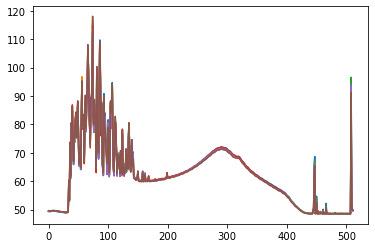

In [5]:
for si in range(len(sis)):
    plt.plot(10*np.log10(np.abs(xst[:,si,si])))

In [6]:
def LoadFiles(fpath):
    files=listdir(fpath)#[f for f in listdir(fpath)];
    files.sort()
    files = [f for f in files if isfile(join(fpath,f))]
    print(len(files))
    return
    Data=[]
    Bands=[]
    for f in files:
        ext=f.split('.')[-1]
        if ext!='h5': continue;
        s=f.split('_');
        band=int(s[1][2:])
        ftime=s[2][:16]
        try:
         D=loadXST(join(fpath,f));
         D=np.array(D)
         print("band=",band," time=",ftime," Data size=",D.shape)
         Bands.append(band)
         Data.append(D)
        except:
         print('Can not open',f)
        gc.collect()
    return Bands,Data
